

# Udacity Project #2: TMDb Movie Data Trends
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database(TMDb) is a movie and television database that has data for over 400 thousand movies, and 75 thousands television shows with numerous edits being done every week.

This dataset contains information of 10,000 movies from TMDb with details on the movie's popularity, budget and revenue.

Looking through thos dataset there is one question that one canno't resist asking: What factor brings in the most revenue? Is it length of the movie? Genre? Director? Popularity?

To get more insight, I addressed the following questions:
1. Do popular movies make more money?
2. Is there a significant difference in runtime between movies of greater and lower profit margin?
3. What genres is both popular and highly profitable? 
4. What director that makes popular movie with a high revenue on average?


In [32]:
# import statements for all of the packages that is being used
 
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling
First step is to load the data and have an overview look at it. In this step, the data is cleaned and trimmed.


### Loading the dataset and taking a look on details.

In [33]:
#loading the data
df= pd.read_csv('tmdb-movies.csv')
df.head(35)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [34]:
#to get more detailed information on datatype and missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning 
When looking at the data more closely, there are some changes that must be done before starting our analysis:

1. There are several columns that are useless to us and should be dropped to have a cleaner and clearer dataframe.
2. Change the missing entry from "0" to NaN and drop all NaN
3. Drop any duplicates
4. Convert the datatype of budget_adj and revenue_adj columns into integer


In [35]:
#Here the cleaning process happens. 

#removing unused columns
df.drop(['id','imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','production_companies','vote_count','vote_average','release_date'], axis=1 ,inplace=True)


In [36]:
#ensure that the columns has been dropped
df.shape

(10866, 8)

In [37]:
#replacing the missing values from "0" to "NaN"
df.replace(0,np.NaN, inplace=True)

#removing the rows with NaN values 
df.dropna(inplace=True)



In [38]:
#ensure that all NaN values have been dropped
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [39]:
#look at any duplicates 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10690    False
10691    False
10692    False
10716    False
10724    False
10725    False
10727    False
10728    False
10755    False
10756    False
10757    False
10758    False
10759    False
10760    False
10762    False
10770    False
10771    False
10775    False
10777    False
10778    False
10779    False
10780    False
10788    False
10791    False
10793    False
10822    False
10828    False
10829    False
10835    False
10848    False
Length: 3854, dtype: bool

In [40]:
#dropping duplicated

df.drop_duplicates(keep='first', inplace=True)

In [41]:
#now our numerical data for budget_adj and revenue_adj
#are all floats and we need to convert to integer

df["budget_adj"]= df['budget_adj'].astype('int')
df["revenue_adj"]= df['revenue_adj'].astype('int')



In [42]:
#ensure the change has been made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 8 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null float64
genres            3853 non-null object
release_year      3853 non-null int64
budget_adj        3853 non-null int64
revenue_adj       3853 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 270.9+ KB


In [43]:
#create a profit columnn that is the difference between the revenue adj and the budget adj 
#then removing the two latter columns 
df.insert(7,'profit', df['revenue_adj']- df['budget_adj'])


In [44]:
#ensure that the new column has been added
df.shape

(3853, 9)

In [45]:
#save clean data to new csv
df.to_csv('tmdb_edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### First Question: Do Popular Movies Make Greater Profit?
I started off by looking at the overall trend of average popularity with corresponding average runtimes throughout the years.

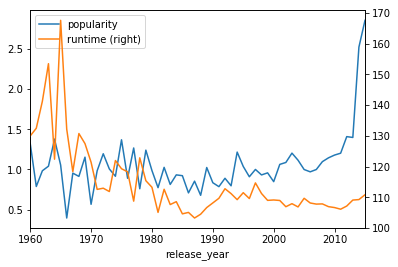

In [46]:
#popularity average with average runtime trend
df.groupby('release_year')['popularity','runtime'].mean().plot(kind='line',alpha=5,secondary_y='runtime');

The line graph about allows us to appreciate the change in average runtime and it relationship with movie popularity throughout the years.The average runtime has decreased from 1960s till the 80s, with sharp fluctuations between the 1960s and 1970s and is more or less steady from the 90s till 2015. On the other hand, average movie popularity has been fluctuating, with an overall increasing trend starting in the 90s.

Wanting to take a closer look at the distribution of popularity in terms of revenue, a profit column has been created in the previous section as the difference between the revenue and budget. Now I categorize the profit column into four levels: "Low", "Medium","Moderately High", "High" using profit percentiles (min, 25%, 50%, 74%, max).

In [47]:
#look at the percentiles of profit

In [48]:
#create bins using the quantiles of revenue_adj min,25%, 50%, 75% and max

bin_edges=[-4.139124e+08,-1.504995e+06,2.737064e+07
,1.074548e+08,2.750137e+09]
bin_names=['Low','Medium','Moderately High','High']
df['profit']= pd.cut(df['profit'],bin_edges,labels=bin_names)

#look at the data to ensure changes have been made
df.head()



,popularity,original_title,director,runtime,genres,release_year,budget_adj,profit,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,1392445892
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,348161292
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015,101199955,High,271619025
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015,183999919,High,1902723129
4,9.335014,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015,174799923,High,1385748801


In [49]:
#getting the means for each profit level
df.groupby('profit').mean()

,popularity,runtime,release_year,budget_adj,revenue_adj
profit,,,,,
Low,0.632174,107.474559,2002.854621,3.799863e+07,1.940588e+07
Medium,0.768763,104.651767,2002.444906,2.306407e+07,3.287381e+07
Moderately High,1.132754,108.437175,2000.538941,3.760250e+07,9.763056e+07
High,2.233065,116.269710,1999.192946,7.788399e+07,3.982307e+08


Text(0,0.5,'Popularity Average')

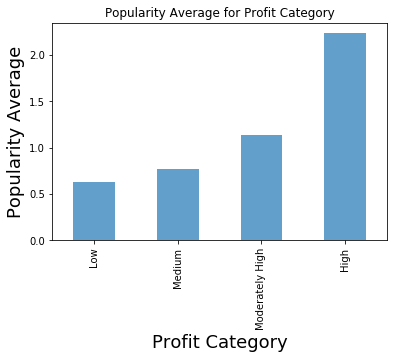

In [50]:
#visualize popularity vs profit category
df.groupby('profit')['popularity'].mean().plot(kind='bar', title= 'Popularity Average for Profit Category', alpha=.7)
plt.xlabel('Profit Category', fontsize=18)
plt.ylabel('Popularity Average', fontsize=18)

Movies of high profit cotegory is almost twice as popular than the moderately high, while low and medium profit category are appreciably lower. 


### Second Question: What is the Difference in Average Runtime Between Profit Categories?

Text(0,0.5,'Average Runtime')

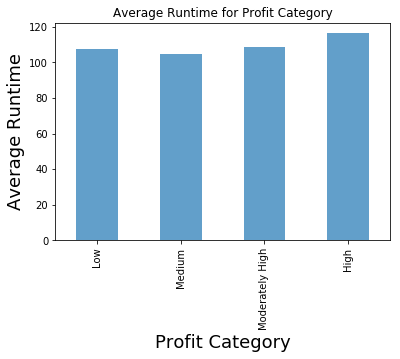

In [51]:
#looking at average runtime for each profit category

df.groupby('profit')['runtime'].mean().plot(kind='bar', title= 'Average Runtime for Profit Category', alpha=.7)
plt.xlabel('Profit Category', fontsize=18)
plt.ylabel('Average Runtime', fontsize=18)

There is no large difference in average runtime in different profit category.

### Third Question: What Genre is popular and makes the most in revenue?

I started off by separating the genres columns into separate genre and duplicating the rows for each genre (for movies with several genres). 

In [52]:
## separating the genres into different rows (duplicates) using split and stack functions and then merge them

b=df['genres'].apply(lambda x: pd.Series(x.split("|"))).stack()
b_reset= b.reset_index()
df_reset= df.reset_index()
df_edit= pd.merge(b_reset, df_reset,left_on='level_0', right_on='index')



In [53]:
#look at the data and see what modifications needs to be made
df_edit

,level_0,level_1,0,index,popularity,original_title,director,runtime,genres,release_year,budget_adj,profit,revenue_adj
0,0,0,Action,0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,1392445892
1,0,1,Adventure,0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,1392445892
2,0,2,Science Fiction,0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,1392445892
3,0,3,Thriller,0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,1392445892
4,1,0,Action,1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,348161292
5,1,1,Adventure,1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,348161292
6,1,2,Science Fiction,1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,348161292
7,1,3,Thriller,1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015,137999939,High,348161292
8,2,0,Adventure,2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015,101199955,High,271619025
9,2,1,Science Fiction,2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015,101199955,High,271619025


In [54]:
## drop index column
df_edit.drop(['genres','level_0','level_1','index'],axis=1, inplace=True)

##rename the new genre column to "genre" by making the names of the columns by forming a list
df_edit.columns=['genre',
 'popularity',
 'original_title',
 'director',
 'runtime',
 'release_year',
 'profit',
 'budget_adj',
 'revenue_adj']

#look at the data again to see if modications has been made
df_edit

,genre,popularity,original_title,director,runtime,release_year,profit,budget_adj,revenue_adj
0,Action,32.985763,Jurassic World,Colin Trevorrow,124.0,2015,137999939,High,1392445892
1,Adventure,32.985763,Jurassic World,Colin Trevorrow,124.0,2015,137999939,High,1392445892
2,Science Fiction,32.985763,Jurassic World,Colin Trevorrow,124.0,2015,137999939,High,1392445892
3,Thriller,32.985763,Jurassic World,Colin Trevorrow,124.0,2015,137999939,High,1392445892
4,Action,28.419936,Mad Max: Fury Road,George Miller,120.0,2015,137999939,High,348161292
5,Adventure,28.419936,Mad Max: Fury Road,George Miller,120.0,2015,137999939,High,348161292
6,Science Fiction,28.419936,Mad Max: Fury Road,George Miller,120.0,2015,137999939,High,348161292
7,Thriller,28.419936,Mad Max: Fury Road,George Miller,120.0,2015,137999939,High,348161292
8,Adventure,13.112507,Insurgent,Robert Schwentke,119.0,2015,101199955,High,271619025
9,Science Fiction,13.112507,Insurgent,Robert Schwentke,119.0,2015,101199955,High,271619025


In [55]:
#looking at the mean revenue and popularity for each genre
df_edit.groupby('genre')['revenue_adj','popularity'].mean()

,revenue_adj,popularity
genre,,
Action,1.953879e+08,1.567116
Adventure,2.714075e+08,1.867693
Animation,2.909574e+08,1.710622
Comedy,1.213897e+08,1.012958
Crime,1.103951e+08,1.123961
Documentary,2.480617e+07,0.294458
Drama,1.014299e+08,1.001898
Family,2.437910e+08,1.459043
Fantasy,2.499928e+08,1.754315


Text(0.5,0,'Genre')

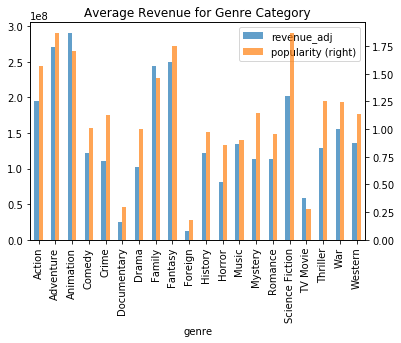

In [56]:
#visualization of the data above
df_edit.groupby('genre')['revenue_adj','popularity'].mean().plot(kind='bar', title= 'Average Revenue for Genre Category', alpha=.7,  secondary_y= 'popularity')
plt.xlabel('Genre', fontsize=18)





We can see that Adventure and Animation movies seems to be as highly popular and high in revenue.  

### Fourth Question: Which director makes the most popular movies with the high revenue?

Now in order to be able to compare between the directors, I looked the top 20 directors with the largest number of movies within the years 1960s to 2015.

In [57]:
#looking for most common directors (top 20) within those years
df.groupby('director').director.value_counts().nlargest(20)


director              director            
Steven Spielberg      Steven Spielberg        27
Clint Eastwood        Clint Eastwood          24
Ridley Scott          Ridley Scott            21
Woody Allen           Woody Allen             18
Martin Scorsese       Martin Scorsese         17
Steven Soderbergh     Steven Soderbergh       17
Tim Burton            Tim Burton              16
Brian De Palma        Brian De Palma          15
Oliver Stone          Oliver Stone            15
Renny Harlin          Renny Harlin            15
Robert Zemeckis       Robert Zemeckis         15
Joel Schumacher       Joel Schumacher         14
Ron Howard            Ron Howard              14
Tony Scott            Tony Scott              14
Wes Craven            Wes Craven              14
Francis Ford Coppola  Francis Ford Coppola    13
Richard Donner        Richard Donner          13
Barry Levinson        Barry Levinson          12
John Carpenter        John Carpenter          12
Rob Reiner            Rob 

In [58]:
#director and profit category
dir_name= df['director'][:20]

Text(0.5,0,'director')

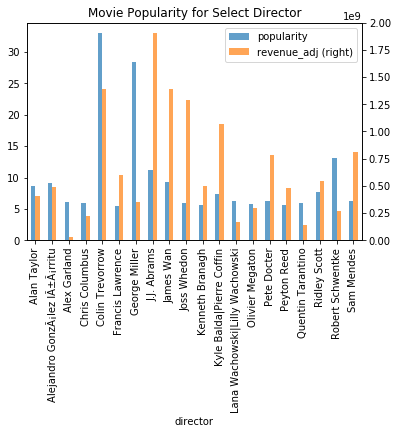

In [59]:
#visualize average popularity and revenue for each director
df.groupby(dir_name)['popularity','revenue_adj'].mean().plot(kind='bar', title= 'Movie Popularity for Select Director', alpha=.7, secondary_y= 'revenue_adj')
plt.xlabel('director', fontsize=18)


<a id='conclusions'></a>
## Conclusions

There are several points that can be concluded:

1. The length of movies has decreased, compared to movies from the 60s, but are more or less stable beginning in the 90s. The length of the movies doesn't seem to be correlated to greater revenue.
2. There is a positive correlation between the average popularity and revenue.
3. Animation and Adventure are the two genres seem to be both popular and profitable while Science Fiction is not popular but is the most profitable genre.
4. Colin Trevorrow is the director to the most popular and highly profitable movies.

Now for a profitable movie, an animation and/or adventure genre directed by Colin Treverrow seem to be very likely to be sucessful.

Now, there are limitations to my analysis. Starting off with 10,000 data point, I ended up with a little under 4,000 points after cleaning the data.
These results aren't conclusive to the movie industry but rather to the dataset at hand.



In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0